In [1]:
!pip install -Uqq fastbook
!pip install ipywidgets

In [24]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *
from fastai.text.all import *
from fastai.tabular.all import *
from fastai.tabular.all import *
from fastai.collab import *
import ipywidgets

In [3]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.148982,0.023881,0.008119,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.054023,0.021282,0.006089,00:58


In [4]:
uploader = ipywidgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [6]:
img = PILImage.create(uploader.data[0])

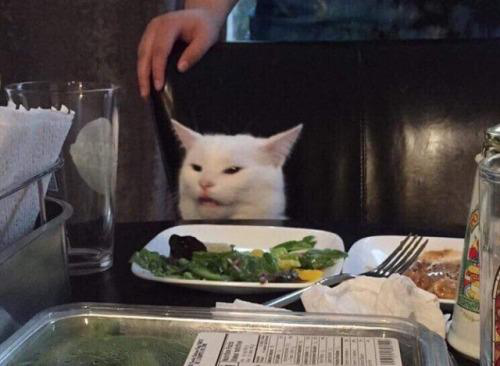

In [7]:
img

In [8]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat 0.999999


# What is Machine learning ?

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

# What is a Neural network

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

# Deep Learning Is Not Just for Image Classification

## Picture Segementaion|


In [9]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.809541,2.061012,00:01


epoch,train_loss,valid_loss,time
0,1.725299,1.431507,00:01
1,1.508063,1.162201,00:01
2,1.361293,1.206179,00:01
3,1.251286,0.975879,00:01
4,1.138022,0.806397,00:01
5,1.027437,0.802739,00:01
6,0.938156,0.766476,00:01
7,0.868712,0.760510,00:01


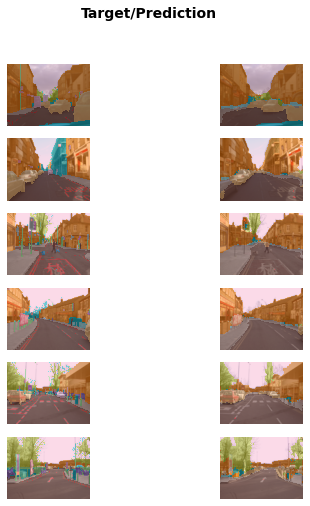

In [10]:
learn.show_results(max_n=6, figsize=(7,8))

In [18]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

FileNotFoundError: ignored

In [ ]:
learn.predict('I really liked that movie')

In [15]:
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls, metrics=accuracy)


In [16]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.382937,0.378232,0.825246,00:04
1,0.363105,0.365214,0.830620,00:04
2,0.360032,0.362460,0.829085,00:04


In [22]:
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [23]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.379933,0.362919,0.836763,00:04
1,0.355806,0.360093,0.834152,00:04
2,0.357174,0.352876,0.837070,00:04


In [25]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502086,1.508741,00:00


epoch,train_loss,valid_loss,time
0,1.333913,1.450177,00:00
1,1.240095,1.269073,00:00
2,1.011032,0.954975,00:00
3,0.787451,0.803369,00:00
4,0.683045,0.763707,00:00
5,0.631649,0.749368,00:00
6,0.621471,0.743356,00:00
7,0.598553,0.739569,00:00
8,0.589449,0.738653,00:00
9,0.582927,0.738511,00:00


In [26]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,1.0,84.0,5.0,3.653934
1,18.0,70.0,3.0,3.523015
2,56.0,16.0,5.0,4.614151
3,10.0,2.0,5.0,3.306032
4,49.0,83.0,5.0,4.487015
5,2.0,41.0,3.5,4.353808
6,50.0,18.0,3.0,3.680042
7,25.0,44.0,2.0,3.094897
8,77.0,32.0,4.0,3.233814
